<a href="https://colab.research.google.com/github/apoorv2512/INBT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/iNeuBytes/AQI.csv')

In [ ]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 3.3+ MB


In [ ]:
df.shape

(43824, 10)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
pm2.5,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
DEWP,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
TEMP,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
PRES,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
Iws,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


In [ ]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)


In [ ]:
df.dtypes=='object'

year     False
month    False
day      False
hour     False
pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd      True
Iws      False
dtype: bool

In [ ]:
df = df[df['DEWP'] > 0]
df = df[df['TEMP'] > 0]

In [ ]:
df.shape

(41757, 10)

In [ ]:
df['cbwd'].nunique()

4

In [ ]:
df1 = pd.get_dummies(df['cbwd'])

In [ ]:
df = pd.concat([df,df1],axis=1)

In [ ]:
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,NE,NW,SE,cv
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,1,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,1,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,1,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,0,0,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,1,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,1,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,1,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,1,0,0


In [ ]:
df.drop('cbwd',axis=1,inplace=True)

In [ ]:
df.head(2)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NE,NW,SE,cv
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,1,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,1,0


<Axes: xlabel='pm2.5', ylabel='Density'>

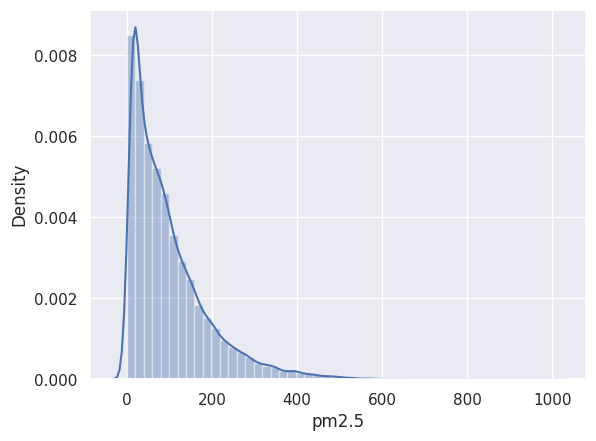

In [ ]:
sns.distplot(df['pm2.5'],bins=50)

<Axes: >

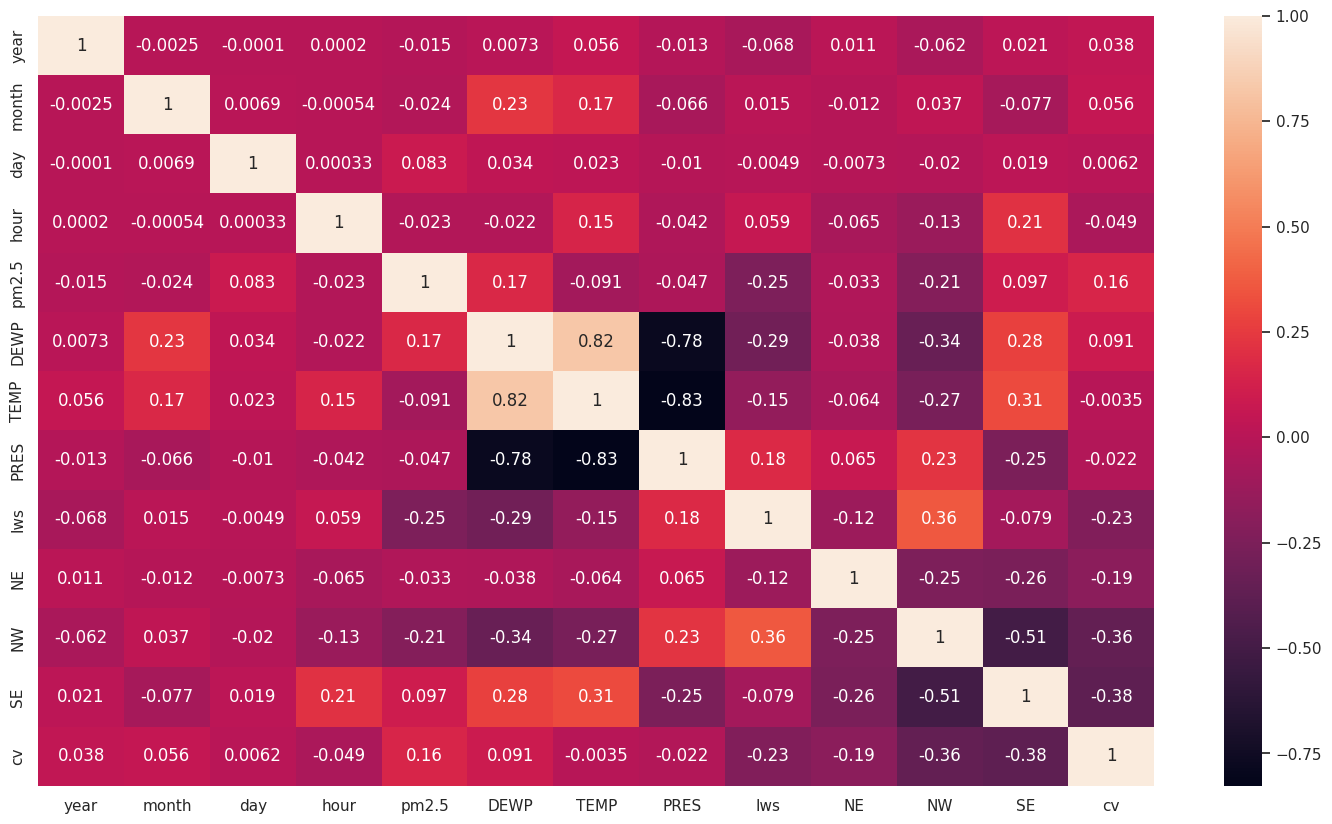

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)


In [ ]:

df['year'].unique()

array([2010, 2011, 2012, 2013, 2014])

<Axes: >

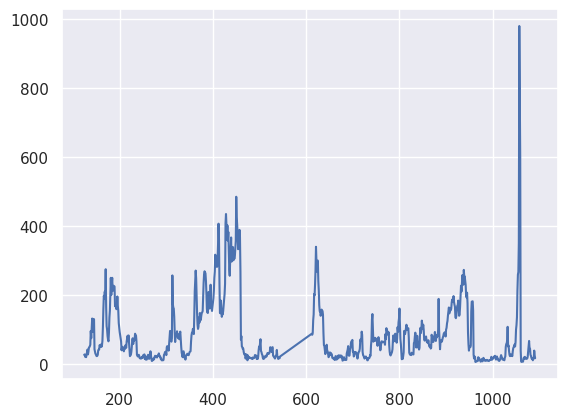

In [ ]:
df['pm2.5'][100:1000].plot()

<Axes: >

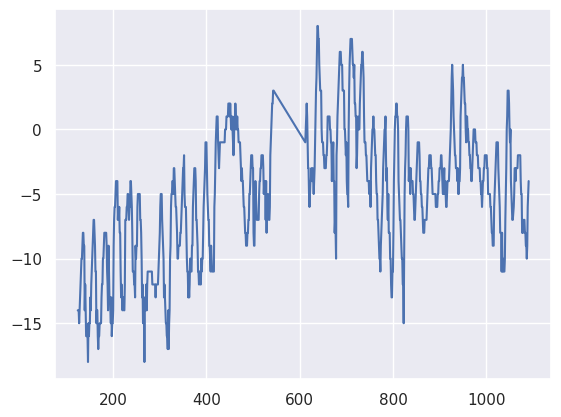

In [ ]:
df['TEMP'][100:1000].plot()

<Axes: >

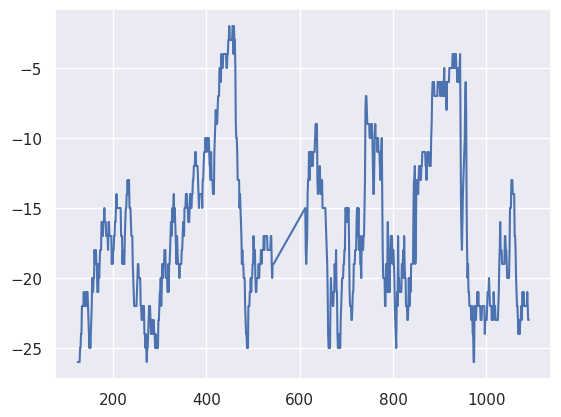

In [ ]:
df['DEWP'][100:1000].plot()

In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'NE', 'NW', 'SE', 'cv'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = df[['DEWP','TEMP', 'PRES','Iws', 'NE', 'NW', 'SE', 'cv']]
import statsmodels as sm
data = sm.tools.add_constant(df1)
series = pd.Series([variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])],index=df1.columns)
series

DEWP        3.819116
TEMP        4.473381
PRES        3.495297
Iws         1.253771
NE       3930.906849
NW      11120.407624
SE      12036.191594
cv       7385.787711
dtype: float64

In [ ]:
df2 = df[['DEWP','TEMP', 'PRES','Iws']]
import statsmodels as sm
data = sm.tools.add_constant(df2)
series = pd.Series([variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])],index=df2.columns)
series

DEWP    3.489878
TEMP    6.462374
PRES    3.667424
Iws     1.386984
dtype: float64

In [ ]:
y = df['pm2.5']
x = df[['DEWP','TEMP', 'PRES','Iws', 'NE', 'NW', 'SE', 'cv']]

In [ ]:
y.shape,x.shape

((41757,), (41757, 8))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(29229, 8)
(12528, 8)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mse = mean_squared_error
mae = mean_absolute_error

In [ ]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF_score = RF.score(x_train,y_train)
RF_pred = RF.predict(x_test)
print('RF Regressor',RF_score)

RF Regressor 0.9039498334841238


In [ ]:
print('RF on testing',explained_variance_score(RF_pred,y_test))

RF on testing -0.14529837267695256


In [ ]:
RF_mae = mae(y_test,RF_pred)
RF_mse = mse(y_test,RF_pred)
RF_rmse = np.sqrt(RF_mse)

In [ ]:
print('Random Forest Regressor')
RF_mae,RF_mse,RF_rmse

Random Forest Regressor


(47.373496718173804, 5160.013540505875, 71.83323423392459)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
 'max_depth': [None, 5, 10],
 'max_features': ['sqrt', 'log2']
 }
rf = RandomizedSearchCV(RF, param_distributions=param_grid,cv=10,n_iter=10)
rf.fit(x_train,y_train)
print('best param',rf.best_params_)
print('score',rf.best_score_)

best param {'max_features': 'log2', 'max_depth': None}
score 0.40489126217130533


In [ ]:
RF_model = rf.best_estimator_
test_score_rf = RF_model.score(x_test,y_test)
print('Random Forest score',test_score_rf)

Random Forest score 0.40318338109357077


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train)
print(pca.components_)
print(pca.explained_variance_)

[[-5.14244833e-01 -5.05858019e-01  4.90085645e-01  2.21910223e-01
   3.10502894e-02  3.20660069e-01 -2.89095072e-01 -5.35618178e-02]
 [ 3.20697733e-02  1.64967894e-01 -1.38266320e-01  4.64095972e-01
  -2.73531245e-01  4.11425787e-01  3.19018895e-01 -6.25612421e-01]
 [-1.70686682e-01 -1.85228965e-01  2.30697504e-01 -1.45908920e-01
   4.32643517e-01 -4.53071098e-01  5.31001689e-01 -4.33161529e-01]
 [ 1.43755718e-01  1.67045627e-01 -1.90331091e-01  1.77104005e-02
   7.44987874e-01  2.32606516e-01 -4.63052533e-01 -3.02258331e-01]
 [-2.53481122e-02  8.88372327e-02 -3.12014460e-02  8.36567835e-01
   2.03550672e-01 -4.00943377e-01  9.38345487e-04  2.97416876e-01]
 [-6.76265168e-01 -9.12126421e-02 -7.25141475e-01 -7.13098693e-02
   5.85907832e-03 -4.79670866e-02  2.12471653e-02  2.53733803e-02]
 [-4.76179617e-01  7.99041581e-01  3.52771221e-01 -9.40046265e-02
  -1.28453927e-03  3.50685832e-03 -2.66650601e-02  2.78594257e-02]
 [ 1.06783371e-16  2.57832792e-16  1.42280214e-16 -6.58489970e-17
  -

In [ ]:
x_train = pca.transform(x_train)
x_train.shape

(29229, 8)

In [ ]:
x_test = pca.transform(x_test)
x_test.shape

(12528, 8)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
train_score = lr.score(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Linear Regression Training score',train_score)

Linear Regression Training score 0.25201358109346295


In [ ]:
lr_mae = mae(y_test,lr_pred)

In [ ]:
print('Linear Regression testing score',explained_variance_score(y_test,lr_pred))

Linear Regression testing score 0.24835113731153213


In [ ]:
lr_mse = mse(y_test,lr_pred)
lr_rmse = np.sqrt(lr_mse)

In [ ]:
lr_mae,lr_mse,lr_rmse

(57.719384833645606, 6425.363398720761, 80.15836449629421)

In [ ]:
r = Ridge()
r.fit(x_train,y_train)
r_score = r.score(x_train,y_train)
r_pred = r.predict(x_test)
print('RIDGE training score',r_score)

RIDGE training score 0.2520135733570993


In [ ]:
print('RF on testing',explained_variance_score(y_test,r_pred))

RF on testing 0.2483510221609201


In [ ]:
r_mae = mae(y_test,r_pred)
r_mse = mse(y_test,r_pred)
r_rmse = np.sqrt(r_mse)

In [ ]:
print('Ridge metrics')
r_mae,r_mse,r_rmse

Ridge metrics


(57.71889762282729, 6425.3643361813865, 80.15837034384735)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha':[0.001,0.01,0.1,1,10],
 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
 }
ridge_tune = RandomizedSearchCV(r,param_grid,cv=5)
ridge_tune.fit(x_train,y_train)
print('best param',ridge_tune.best_params_)
print('score',ridge_tune.best_score_)

best param {'solver': 'sag', 'alpha': 0.001}
score 0.25166074963943985


In [ ]:
ridge_model = ridge_tune.best_estimator_
test_score = ridge_model.score(x_test,y_test)
print('ridge test score',test_score)

ridge test score 0.2483286730891371
